## Clase 3 - Analisis de clientes

- Importacion de acrhivos
- Manejo de la información
- Primero uso de algoritmo de clasificacion
- Primeras visualizaciones
- Primer algoritmo de machine learning (no supervisado)

In [1]:
import matplotlib.pyplot as plt #Vamos a usar graaaficos!!!
import pandas as pd #Voy a usar pandas para manejar los archivos
import numpy as np #Usaremos Numpy para operaciones matematicas

En la carpeta data hay 2 csv -> _cliente.csv_ y _ventas.csv_. Ambos vienen de la base de datos de Huevos Hermanos.

In [2]:
#Leer .*CSV en pandas:
cliente = pd.read_csv('data/cliente.csv', sep = ';') 
#El sep = ';' es para decirle a pandas que nuestro
#archivo esta sepadarado por ; en vez de ,
ventas = pd.read_csv('data/ventas.csv', sep = ';') 

In [3]:
#Esta es la base de cliente.
cliente.head(5)

id                nombre      comuna                   dirección depto  \
0   1          Agustin 1605       Ñuñoa                  Cerezos 33  1605   
1   2  Agustin Depto Guaton       Ñuñoa                  Cerezos 33  1605   
2   3       Agustina Barcia  Las Condes   Martin Alonso Pinzon 6500    32   
3   4          Aida Salazar         NaN                         NaN   NaN   
4   5   Alberto Veliz Perez    La Reina  Dr. Genaro Benavieses 6174     B   

    teléfono whatsapp observaciones  
0  962386970       No           NaN  
1  962386970       No           NaN  
2  962874433       Si           NaN  
3  999699049       Si           NaN  
4  977088919       Si           NaN

In [4]:
#Estas son las columnas que tiene:
cliente.columns

Index(['id', 'nombre', 'comuna', 'dirección', 'depto', 'teléfono', 'whatsapp',
       'observaciones'],
      dtype='object')

In [5]:
#Estas son las ventas
ventas.head(5)

fecha            nombre        comuna                     direccion  \
0  22-08-2020     Daniela Arcos  Lo Barnechea                  Robles 12729   
1  22-08-2020  Sylvia Sepulveda         Ñuñoa                    Sucre 1940   
2  22-08-2020      Paul Wijnant    Las condes        Alonso de cordova 5045   
3  22-08-2020   Nani Mercandino    Las Condes          constancio vigil 416   
4  22-08-2020    Fabiola Zapata   Providencia  Plaza Pedro De Valdivia 1743   

  depto     telefono categoria                           tipo  cantidad  \
0  401B  56977913112       Sal                     Sal (1 Kg)       1.0   
1   32B  56985051456     Huevo      Tradicionales (1 bandeja)       1.0   
2  1307  56991951136     Huevo  Tradicionales (Media bandeja)       1.0   
3     0  56997992017     Huevo      Tradicionales (1 bandeja)       1.0   
4    12  56985294221     Huevo      Tradicionales (1 bandeja)       2.0   

  tipo_venta total_pagar    metodo_pago monto_pagado deuda estado_entrega  \
0     Normal      $4.000  Transferencia       $4.000    $0      Entregado   
1     Normal      $6.000  Transferencia       $6.000    $0      Entregado   
2     Normal      $4.000  Transferencia       $4.000    $0      Entregado   
3     Normal      $6.000  Transferencia       $6.000    $0      Entregado   
4     Normal     $12.000  Transferencia      $12.000    $0      Entregado   

  estado_venta  
0   Completado  
1   Completado  
2   Completado  
3   Completado  
4   Completado

In [6]:
#Y estas son las columnas
ventas.columns

Index(['fecha', 'nombre', 'comuna', 'direccion', 'depto', 'telefono',
       'categoria', 'tipo', 'cantidad', 'tipo_venta', 'total_pagar',
       'metodo_pago', 'monto_pagado', 'deuda', 'estado_entrega',
       'estado_venta'],
      dtype='object')

## Como consejo
Intenta poner siempre el nombre de las variables en minusculas y simples.

## Buscamos hacer la siguiente tabla.

| id_cliente | dias_desde_primera_compra | sal |  huevo |  miel |  cereza |  quinoa |  huevo2 |        almendra |  nueces | monto_pagado | normal | promocion | gratis | cantidad |
|------------|---------------------|-----|--------|-------|---------|---------|---------|-----------------|---------|--------------|--------|-----------|--------|----------|
| 1          | 301                 | 0   | 0      | 1     | 0       | 3       | 1       | 0               | 0       | 4500         | 2      | 2         | 0      | 5        |
| 2          | 141                 | 0   | 0      | 0     | 1       | 0       | 0       | 0               | 0       | 3500         | 1      | 0         | 0      | 2        |
| 3          | 5                   | 0   | 0      | 0     | 0       | 1       | 0       | 0               | 0       | 4000         | 1      | 0         | 0      | 1        |

## Vamos por parte dijo Camiroaga
Tenemos que obtener lo siguiente:  
-Dias desde primera compra  
-Cantidad de sal, huevo y cada uno de los productos  
-La suma de los montos totales  
-Tipo de ventas  

In [7]:
#Dias desde el registro.
#Paso 0: Identificar la tabla a utilizar
ventas

fecha                   nombre        comuna  \
0     22-08-2020            Daniela Arcos  Lo Barnechea   
1     22-08-2020         Sylvia Sepulveda         Ñuñoa   
2     22-08-2020             Paul Wijnant    Las condes   
3     22-08-2020          Nani Mercandino    Las Condes   
4     22-08-2020           Fabiola Zapata   Providencia   
...          ...                      ...           ...   
2474  08-05-2021                 Tia Mimi    Las Condes   
2475  08-05-2021         Javiera Contente      Vitacura   
2476  08-05-2021         Javiera Contente      Vitacura   
2477  08-05-2021  Cristian Jaramillo meza         Ñuñoa   
2478  08-05-2021            Catalina Cura    Las Condes   

                         direccion depto     telefono categoria  \
0                     Robles 12729  401B  56977913112       Sal   
1                       Sucre 1940   32B  56985051456     Huevo   
2           Alonso de cordova 5045  1307  56991951136     Huevo   
3             constancio vigil 416     0  56997992017     Huevo   
4     Plaza Pedro De Valdivia 1743    12  56985294221     Huevo   
...                            ...   ...          ...       ...   
2474                  latadia 6484     0  56993335142     Huevo   
2475               Las Nieves 3681   202  56956088505       Sal   
2476               Las Nieves 3681   202  56956088505       sal   
2477                Av Grecia 5207     0  56995275558       NaN   
2478                   Hamlet 4000   311  56990997101     Huevo   

                               tipo  cantidad tipo_venta total_pagar  \
0                        Sal (1 Kg)       1.0     Normal      $4.000   
1         Tradicionales (1 bandeja)       1.0     Normal      $6.000   
2     Tradicionales (Media bandeja)       1.0     Normal      $4.000   
3         Tradicionales (1 bandeja)       1.0     Normal      $6.000   
4         Tradicionales (1 bandeja)       2.0     Normal     $12.000   
...                             ...       ...        ...         ...   
2474      Tradicionales (1 bandeja)       1.0     Normal      $6.000   
2475                     Sal (1 Kg)       2.0        NaN      $7.200   
2476             Molino de sal alto       1.0        NaN      $4.500   
2477                            NaN       NaN        NaN          $0   
2478      Tradicionales (1 bandeja)       1.0        NaN      $5.400   

        metodo_pago monto_pagado   deuda estado_entrega       estado_venta  
0     Transferencia       $4.000      $0      Entregado         Completado  
1     Transferencia       $6.000      $0      Entregado         Completado  
2     Transferencia       $4.000      $0      Entregado         Completado  
3     Transferencia       $6.000      $0      Entregado         Completado  
4     Transferencia      $12.000      $0      Entregado         Completado  
...             ...          ...     ...            ...                ...  
2474  Transferencia       $6.000      $0      Entregado  Pendiente de pago  
2475            NaN          NaN  $7.200      Entregado         Completado  
2476            NaN          NaN  $4.500      Entregado  Pendiente de pago  
2477            NaN          NaN      $0      Entregado  Pendiente de pago  
2478            NaN          NaN  $5.400      Entregado         Completado  

[2479 rows x 16 columns]

In [8]:
#Queremos rescatar unicamente el id del cliente y la fecha de su priemra compra.
#Primero hay que agregar la id del cliente. Para eso lo vamos a hacer una union.
ventas.merge(cliente, on = ['nombre']) #Uno la tabla ventas y la combino (merge) con cliente, usando la columna nombre.


fecha                   nombre          comuna_x  \
0     22-08-2020            Daniela Arcos      Lo Barnechea   
1     22-08-2020         Sylvia Sepulveda             Ñuñoa   
2     17-09-2020         Sylvia Sepulveda             Ñuñoa   
3     24-10-2020         Sylvia Sepulveda             Ñuñoa   
4     15-11-2020         Sylvia Sepulveda             Ñuñoa   
...          ...                      ...               ...   
2350  08-05-2021       Maria Ines herrera        Las condes   
2351  08-05-2021   Debora Vega Lisperguer  Estacion central   
2352  08-05-2021   Debora Vega Lisperguer  Estacion central   
2353  08-05-2021         Daniela Maqueira             Ñuñoa   
2354  08-05-2021  Cristian Jaramillo meza             Ñuñoa   

                        direccion depto_x     telefono categoria  \
0                    Robles 12729    401B  56977913112       Sal   
1                      Sucre 1940     32B  56985051456     Huevo   
2                      Sucre 1940     32B  56985051456     Huevo   
3                      Sucre 1940     32B  56985051456     Huevo   
4                      Sucre 1940     32B  56985051456     Huevo   
...                           ...     ...          ...       ...   
2350  av padre huertado norte 182      31  56992232671  Almendra   
2351              Laguna sur 6260    1401  56994439790    Nueces   
2352              Laguna sur 6260    1401  56994439790    Quinoa   
2353    Profesor Rodolfo Lenz 605      61  56993546957     Huevo   
2354               Av Grecia 5207       0  56995275558       NaN   

                           tipo  cantidad tipo_venta  ...    deuda  \
0                    Sal (1 Kg)       1.0     Normal  ...       $0   
1     Tradicionales (1 bandeja)       1.0     Normal  ...       $0   
2     Tradicionales (1 bandeja)       1.0     Normal  ...       $0   
3     Tradicionales (1 bandeja)       1.0     Normal  ...       $0   
4     Tradicionales (1 bandeja)       1.0     Normal  ...       $0   
...                         ...       ...        ...  ...      ...   
2350               Almendra 1kg       1.0  Promocion  ...   $8.100   
2351                 Nueces 1kg       1.0     Normal  ...   $9.000   
2352                     Quinoa       1.0     Normal  ...   $4.000   
2353       Tradicionales (Caja)       2.0     Normal  ...  $60.000   
2354                        NaN       NaN        NaN  ...       $0   

     estado_entrega       estado_venta   id          comuna_y  \
0         Entregado         Completado  194      Lo Barnechea   
1         Entregado         Completado  592             Ñuñoa   
2         Entregado         Completado  592             Ñuñoa   
3         Entregado         Completado  592             Ñuñoa   
4         Entregado         Completado  592             Ñuñoa   
...             ...                ...  ...               ...   
2350      Entregado  Pendiente de pago  413        Las condes   
2351      Entregado  Pendiente de pago  717  Estacion central   
2352      Entregado  Pendiente de pago  717  Estacion central   
2353      Entregado  Pendiente de pago  738             Ñuñoa   
2354      Entregado  Pendiente de pago  718             Ñuñoa   

                        dirección  depto_y   teléfono whatsapp  \
0                    Robles 12729     401B  977913112       Si   
1                      Sucre 1940      32B  985051456       Si   
2                      Sucre 1940      32B  985051456       Si   
3                      Sucre 1940      32B  985051456       Si   
4                      Sucre 1940      32B  985051456       Si   
...                           ...      ...        ...      ...   
2350  av padre huertado norte 182       31  992232671       Si   
2351              Laguna sur 6260     1401  994439790       si   
2352              Laguna sur 6260     1401  994439790       si   
2353    Profesor Rodolfo Lenz 605       61  993546957       si   
2354               Av Grecia 5207      NaN  995275558      NaN   

                      

In [9]:
#Pero como solo me interesa la columna ID de cliente puedo llamar a unicamente a esas columnas
ventas.merge(cliente[['id','nombre']], on = ['nombre'])
#Perfecto. Guardemosla.

fecha                   nombre            comuna  \
0     22-08-2020            Daniela Arcos      Lo Barnechea   
1     22-08-2020         Sylvia Sepulveda             Ñuñoa   
2     17-09-2020         Sylvia Sepulveda             Ñuñoa   
3     24-10-2020         Sylvia Sepulveda             Ñuñoa   
4     15-11-2020         Sylvia Sepulveda             Ñuñoa   
...          ...                      ...               ...   
2350  08-05-2021       Maria Ines herrera        Las condes   
2351  08-05-2021   Debora Vega Lisperguer  Estacion central   
2352  08-05-2021   Debora Vega Lisperguer  Estacion central   
2353  08-05-2021         Daniela Maqueira             Ñuñoa   
2354  08-05-2021  Cristian Jaramillo meza             Ñuñoa   

                        direccion depto     telefono categoria  \
0                    Robles 12729  401B  56977913112       Sal   
1                      Sucre 1940   32B  56985051456     Huevo   
2                      Sucre 1940   32B  56985051456     Huevo   
3                      Sucre 1940   32B  56985051456     Huevo   
4                      Sucre 1940   32B  56985051456     Huevo   
...                           ...   ...          ...       ...   
2350  av padre huertado norte 182    31  56992232671  Almendra   
2351              Laguna sur 6260  1401  56994439790    Nueces   
2352              Laguna sur 6260  1401  56994439790    Quinoa   
2353    Profesor Rodolfo Lenz 605    61  56993546957     Huevo   
2354               Av Grecia 5207     0  56995275558       NaN   

                           tipo  cantidad tipo_venta total_pagar  \
0                    Sal (1 Kg)       1.0     Normal      $4.000   
1     Tradicionales (1 bandeja)       1.0     Normal      $6.000   
2     Tradicionales (1 bandeja)       1.0     Normal      $6.000   
3     Tradicionales (1 bandeja)       1.0     Normal      $6.000   
4     Tradicionales (1 bandeja)       1.0     Normal      $6.000   
...                         ...       ...        ...         ...   
2350               Almendra 1kg       1.0  Promocion      $8.100   
2351                 Nueces 1kg       1.0     Normal      $9.000   
2352                     Quinoa       1.0     Normal      $4.000   
2353       Tradicionales (Caja)       2.0     Normal     $60.000   
2354                        NaN       NaN        NaN          $0   

        metodo_pago monto_pagado    deuda estado_entrega       estado_venta  \
0     Transferencia       $4.000       $0      Entregado         Completado   
1     Transferencia       $6.000       $0      Entregado         Completado   
2     Transferencia       $6.000       $0      Entregado         Completado   
3     Transferencia       $6.000       $0      Entregado         Completado   
4     Transferencia       $6.000       $0      Entregado         Completado   
...             ...          ...      ...            ...                ...   
2350            NaN          NaN   $8.100      Entregado  Pendiente de pago   
2351            NaN          NaN   $9.000      Entregado  Pendiente de pago   
2352            NaN          NaN   $4.000      Entregado  Pendiente de pago   
2353            NaN          NaN  $60.000      Entregado  Pendiente de pago   
2354            NaN          NaN       $0      Entregado  Pendiente de pago   

       id  
0     194  
1     592  
2     592  
3     592  
4     592  
...   ...  
2350  413  
2351  717  
2352  717  
2353  738  
2354  718  

[2355 rows x 17 columns]

In [10]:
ventas_id_cliente = ventas.merge(cliente[['id','nombre']], on = ['nombre'])

In [11]:
#Para agrupar (equivalente a una tabla "dinamica") se usa groupby
ventas_id_cliente.groupby(['id']).agg({'fecha':'min'}).reset_index() #Agrupo en la tabla ventas la id y veo cual es la fecha minima. Nota: Fecha minima = Primera fecha.


id       fecha
0      3  10-04-2021
1      4  21-11-2020
2      5  01-05-2021
3      8  06-03-2021
4     10  23-01-2021
..   ...         ...
394  813  06-02-2021
395  814  20-03-2021
396  815  06-03-2021
397  816  03-04-2021
398  817  17-04-2021

[399 rows x 2 columns]

In [12]:
primera_compra_cliente = ventas_id_cliente.groupby(['id']).agg({'fecha':'min'}).reset_index()

### Como lo calculo los dias desde el registro?!
Hoy - primera_compra_cliente

In [13]:
#Para sacar que día es hoy, vamos a usar el calendario.
from datetime import datetime as dt #Hola calendario!

In [14]:
dt.today() #Calendario, que dia es hoy
#El formato que entrega e: YYYY, M,D,H,M,S,MS

datetime.datetime(2021, 5, 10, 20, 32, 5, 170866)

In [15]:
#Pero podemos pedirlo como queramos.
print(dt.today().strftime("%d/%m/%Y"))
print(dt.today().strftime("%B %d, %Y"))
print(dt.today().strftime("%m/%d/%y"))
print(dt.today().strftime("%b-%d-%Y"))

10/05/2021
May 10, 2021
05/10/21
May-10-2021


In [16]:
#guardemos hoy
hoy = dt.today()

In [17]:
#Restar con la fecha de la primera compra
primera_compra_cliente['dias_desde_primera_compra'] = hoy - pd.to_datetime(primera_compra_cliente['fecha'], dayfirst =True)

In [18]:
primera_compra_cliente

id       fecha dias_desde_primera_compra
0      3  10-04-2021   30 days 20:32:05.207867
1      4  21-11-2020  170 days 20:32:05.207867
2      5  01-05-2021    9 days 20:32:05.207867
3      8  06-03-2021   65 days 20:32:05.207867
4     10  23-01-2021  107 days 20:32:05.207867
..   ...         ...                       ...
394  813  06-02-2021   93 days 20:32:05.207867
395  814  20-03-2021   51 days 20:32:05.207867
396  815  06-03-2021   65 days 20:32:05.207867
397  816  03-04-2021   37 days 20:32:05.207867
398  817  17-04-2021   23 days 20:32:05.207867

[399 rows x 3 columns]

In [19]:
#Liiiisto
#Ahorar pasemos del  22 days a numero
primera_compra_cliente['dias_desde_primera_compra'].astype('timedelta64[D]') #Se transofrma usando astype y diciendole al calendario (timedelta64) que quermos el valor en numero (D: dias en numero, S: segundos, etc.)

0       30.0
1      170.0
2        9.0
3       65.0
4      107.0
       ...  
394     93.0
395     51.0
396     65.0
397     37.0
398     23.0
Name: dias_desde_primera_compra, Length: 399, dtype: float64

In [20]:
#Se actauliza el valor de la tabla
primera_compra_cliente['dias_desde_primera_compra'] = (primera_compra_cliente['dias_desde_primera_compra'].astype('timedelta64[D]'))


In [21]:
primera_compra_cliente

id       fecha  dias_desde_primera_compra
0      3  10-04-2021                       30.0
1      4  21-11-2020                      170.0
2      5  01-05-2021                        9.0
3      8  06-03-2021                       65.0
4     10  23-01-2021                      107.0
..   ...         ...                        ...
394  813  06-02-2021                       93.0
395  814  20-03-2021                       51.0
396  815  06-03-2021                       65.0
397  816  03-04-2021                       37.0
398  817  17-04-2021                       23.0

[399 rows x 3 columns]

## Primera columna LISTA!!!
Siguiente columna: Cantidad de productos comprados

In [22]:
#Comencemos con
ventas_id_cliente

fecha                   nombre            comuna  \
0     22-08-2020            Daniela Arcos      Lo Barnechea   
1     22-08-2020         Sylvia Sepulveda             Ñuñoa   
2     17-09-2020         Sylvia Sepulveda             Ñuñoa   
3     24-10-2020         Sylvia Sepulveda             Ñuñoa   
4     15-11-2020         Sylvia Sepulveda             Ñuñoa   
...          ...                      ...               ...   
2350  08-05-2021       Maria Ines herrera        Las condes   
2351  08-05-2021   Debora Vega Lisperguer  Estacion central   
2352  08-05-2021   Debora Vega Lisperguer  Estacion central   
2353  08-05-2021         Daniela Maqueira             Ñuñoa   
2354  08-05-2021  Cristian Jaramillo meza             Ñuñoa   

                        direccion depto     telefono categoria  \
0                    Robles 12729  401B  56977913112       Sal   
1                      Sucre 1940   32B  56985051456     Huevo   
2                      Sucre 1940   32B  56985051456     Huevo   
3                      Sucre 1940   32B  56985051456     Huevo   
4                      Sucre 1940   32B  56985051456     Huevo   
...                           ...   ...          ...       ...   
2350  av padre huertado norte 182    31  56992232671  Almendra   
2351              Laguna sur 6260  1401  56994439790    Nueces   
2352              Laguna sur 6260  1401  56994439790    Quinoa   
2353    Profesor Rodolfo Lenz 605    61  56993546957     Huevo   
2354               Av Grecia 5207     0  56995275558       NaN   

                           tipo  cantidad tipo_venta total_pagar  \
0                    Sal (1 Kg)       1.0     Normal      $4.000   
1     Tradicionales (1 bandeja)       1.0     Normal      $6.000   
2     Tradicionales (1 bandeja)       1.0     Normal      $6.000   
3     Tradicionales (1 bandeja)       1.0     Normal      $6.000   
4     Tradicionales (1 bandeja)       1.0     Normal      $6.000   
...                         ...       ...        ...         ...   
2350               Almendra 1kg       1.0  Promocion      $8.100   
2351                 Nueces 1kg       1.0     Normal      $9.000   
2352                     Quinoa       1.0     Normal      $4.000   
2353       Tradicionales (Caja)       2.0     Normal     $60.000   
2354                        NaN       NaN        NaN          $0   

        metodo_pago monto_pagado    deuda estado_entrega       estado_venta  \
0     Transferencia       $4.000       $0      Entregado         Completado   
1     Transferencia       $6.000       $0      Entregado         Completado   
2     Transferencia       $6.000       $0      Entregado         Completado   
3     Transferencia       $6.000       $0      Entregado         Completado   
4     Transferencia       $6.000       $0      Entregado         Completado   
...             ...          ...      ...            ...                ...   
2350            NaN          NaN   $8.100      Entregado  Pendiente de pago   
2351            NaN          NaN   $9.000      Entregado  Pendiente de pago   
2352            NaN          NaN   $4.000      Entregado  Pendiente de pago   
2353            NaN          NaN  $60.000      Entregado  Pendiente de pago   
2354            NaN          NaN       $0      Entregado  Pendiente de pago   

       id  
0     194  
1     592  
2     592  
3     592  
4     592  
...   ...  
2350  413  
2351  717  
2352  717  
2353  738  
2354  718  

[2355 rows x 17 columns]

In [23]:
#Podemos hacer una tabla dinamica, equivalente a la de excel.
#Dinamica: En fila iria el id, en columnas la cateogira y en valor la cantidad y esta variable la vamos a sumar.
pd.pivot_table(ventas_id_cliente, values= 'cantidad', index= 'id', columns='categoria' , aggfunc=np.sum).reset_index().fillna(0)
#Ojo piojo: Mira que se repite Sal y sal. Hay que manejar un poco la info, lo mejor es pasar todo a minusculas.

categoria   id  Almendra  Cereza  Huevo  Miel  Nueces  Quinoa  Sal  huevo  sal
0            3       0.0     0.0    2.0   1.0     0.0     0.0  0.0    0.0  0.0
1            4       0.0     0.0    1.0   0.0     0.0     0.0  0.0    0.0  0.0
2            5       1.0     0.0    7.0   0.0     0.0     0.0  0.0    0.0  0.0
3            8       0.0     0.0    2.0   0.0     0.0     0.0  0.0    0.0  0.0
4           10       0.0     0.0    1.0   0.0     0.0     0.0  0.0    0.0  0.0
..         ...       ...     ...    ...   ...     ...     ...  ...    ...  ...
393        813       0.0     0.0    1.0   0.0     0.0     0.0  0.0    0.0  0.0
394        814       0.0     0.0    2.0   1.0     0.0     0.0  0.0    0.0  0.0
395        815       0.0     0.0    3.0   0.0     0.0     0.0  3.0    0.0  0.0
396        816       0.0     0.0    1.0   0.0     0.0     0.0  0.0    0.0  0.0
397        817       0.0     0.0    1.0   0.0     0.0     0.0  1.0    0.0  0.0

[398 rows x 10 columns]

In [24]:
ventas_id_cliente['categoria'] = ventas_id_cliente['categoria'].str.lower()

In [25]:
pd.pivot_table(ventas_id_cliente, values= 'cantidad', index= 'id', columns='categoria' , aggfunc=np.sum).reset_index().fillna(0)
#Ahooora si. Guardemos la tabla.

categoria   id  almendra  cereza  huevo  miel  nueces  quinoa  sal
0            3       0.0     0.0    2.0   1.0     0.0     0.0  0.0
1            4       0.0     0.0    1.0   0.0     0.0     0.0  0.0
2            5       1.0     0.0    7.0   0.0     0.0     0.0  0.0
3            8       0.0     0.0    2.0   0.0     0.0     0.0  0.0
4           10       0.0     0.0    1.0   0.0     0.0     0.0  0.0
..         ...       ...     ...    ...   ...     ...     ...  ...
393        813       0.0     0.0    1.0   0.0     0.0     0.0  0.0
394        814       0.0     0.0    2.0   1.0     0.0     0.0  0.0
395        815       0.0     0.0    3.0   0.0     0.0     0.0  3.0
396        816       0.0     0.0    1.0   0.0     0.0     0.0  0.0
397        817       0.0     0.0    1.0   0.0     0.0     0.0  1.0

[398 rows x 8 columns]

In [26]:
compras_clientes = pd.pivot_table(ventas_id_cliente, values= 'cantidad', index= 'id', columns='categoria' , aggfunc=np.sum).reset_index().fillna(0)

## Segunda columna lista!!!!
Tercera columa: Monto pagado

In [27]:
#Comencemos con la venta con el id
ventas_id_cliente

fecha                   nombre            comuna  \
0     22-08-2020            Daniela Arcos      Lo Barnechea   
1     22-08-2020         Sylvia Sepulveda             Ñuñoa   
2     17-09-2020         Sylvia Sepulveda             Ñuñoa   
3     24-10-2020         Sylvia Sepulveda             Ñuñoa   
4     15-11-2020         Sylvia Sepulveda             Ñuñoa   
...          ...                      ...               ...   
2350  08-05-2021       Maria Ines herrera        Las condes   
2351  08-05-2021   Debora Vega Lisperguer  Estacion central   
2352  08-05-2021   Debora Vega Lisperguer  Estacion central   
2353  08-05-2021         Daniela Maqueira             Ñuñoa   
2354  08-05-2021  Cristian Jaramillo meza             Ñuñoa   

                        direccion depto     telefono categoria  \
0                    Robles 12729  401B  56977913112       sal   
1                      Sucre 1940   32B  56985051456     huevo   
2                      Sucre 1940   32B  56985051456     huevo   
3                      Sucre 1940   32B  56985051456     huevo   
4                      Sucre 1940   32B  56985051456     huevo   
...                           ...   ...          ...       ...   
2350  av padre huertado norte 182    31  56992232671  almendra   
2351              Laguna sur 6260  1401  56994439790    nueces   
2352              Laguna sur 6260  1401  56994439790    quinoa   
2353    Profesor Rodolfo Lenz 605    61  56993546957     huevo   
2354               Av Grecia 5207     0  56995275558       NaN   

                           tipo  cantidad tipo_venta total_pagar  \
0                    Sal (1 Kg)       1.0     Normal      $4.000   
1     Tradicionales (1 bandeja)       1.0     Normal      $6.000   
2     Tradicionales (1 bandeja)       1.0     Normal      $6.000   
3     Tradicionales (1 bandeja)       1.0     Normal      $6.000   
4     Tradicionales (1 bandeja)       1.0     Normal      $6.000   
...                         ...       ...        ...         ...   
2350               Almendra 1kg       1.0  Promocion      $8.100   
2351                 Nueces 1kg       1.0     Normal      $9.000   
2352                     Quinoa       1.0     Normal      $4.000   
2353       Tradicionales (Caja)       2.0     Normal     $60.000   
2354                        NaN       NaN        NaN          $0   

        metodo_pago monto_pagado    deuda estado_entrega       estado_venta  \
0     Transferencia       $4.000       $0      Entregado         Completado   
1     Transferencia       $6.000       $0      Entregado         Completado   
2     Transferencia       $6.000       $0      Entregado         Completado   
3     Transferencia       $6.000       $0      Entregado         Completado   
4     Transferencia       $6.000       $0      Entregado         Completado   
...             ...          ...      ...            ...                ...   
2350            NaN          NaN   $8.100      Entregado  Pendiente de pago   
2351            NaN          NaN   $9.000      Entregado  Pendiente de pago   
2352            NaN          NaN   $4.000      Entregado  Pendiente de pago   
2353            NaN          NaN  $60.000      Entregado  Pendiente de pago   
2354            NaN          NaN       $0      Entregado  Pendiente de pago   

       id  
0     194  
1     592  
2     592  
3     592  
4     592  
...   ...  
2350  413  
2351  717  
2352  717  
2353  738  
2354  718  

[2355 rows x 17 columns]

In [28]:
#Vamos a agruparla haciendo un groupby y sumar la venta
ventas_id_cliente.groupby(['id']).agg({'total_pagar':'sum'})

total_pagar
id                                                   
3                                $25.000$25.000$4.800
4                                              $5.500
5    $5.500$5.500$5.500$5.500$5.500$5.500$8.000$6.000
8                                             $10.000
10                                             $4.950
..                                                ...
813                                            $4.950
814                                     $11.000$4.800
815              $4.950$3.600$4.500$5.500$5.500$3.500
816                                            $5.500
817                                      $5.500$3.500

[399 rows x 1 columns]

### Oh que paso?
Parece que concatenó los montos.  
Te acuerdas que cuando sumabamos string se unian?
```
'hola'+'algo'
>>> 'holaalgo'

In [29]:
#Hay que sacar los $ y los puntos.
ventas_id_cliente['total_pagar'] = ventas_id_cliente['total_pagar'].str.replace('$','').str.replace('.','').fillna(0).astype(int)

In [30]:
ventas_id_cliente.groupby(['id']).agg({'total_pagar':'sum'}).reset_index()
#Ahora si que si

id  total_pagar
0      3        54800
1      4         5500
2      5        47000
3      8        10000
4     10         4950
..   ...          ...
394  813         4950
395  814        15800
396  815        27550
397  816         5500
398  817         9000

[399 rows x 2 columns]

In [31]:
#Guardemosla:
monto_venta = ventas_id_cliente.groupby(['id']).agg({'total_pagar':'sum'}).reset_index()

## Tercera columna lista!!!
Cuarta columna: Tipo de venta (promocion, normal, etc.)

In [32]:
#Usemos la venta con el id.
ventas_id_cliente

fecha                   nombre            comuna  \
0     22-08-2020            Daniela Arcos      Lo Barnechea   
1     22-08-2020         Sylvia Sepulveda             Ñuñoa   
2     17-09-2020         Sylvia Sepulveda             Ñuñoa   
3     24-10-2020         Sylvia Sepulveda             Ñuñoa   
4     15-11-2020         Sylvia Sepulveda             Ñuñoa   
...          ...                      ...               ...   
2350  08-05-2021       Maria Ines herrera        Las condes   
2351  08-05-2021   Debora Vega Lisperguer  Estacion central   
2352  08-05-2021   Debora Vega Lisperguer  Estacion central   
2353  08-05-2021         Daniela Maqueira             Ñuñoa   
2354  08-05-2021  Cristian Jaramillo meza             Ñuñoa   

                        direccion depto     telefono categoria  \
0                    Robles 12729  401B  56977913112       sal   
1                      Sucre 1940   32B  56985051456     huevo   
2                      Sucre 1940   32B  56985051456     huevo   
3                      Sucre 1940   32B  56985051456     huevo   
4                      Sucre 1940   32B  56985051456     huevo   
...                           ...   ...          ...       ...   
2350  av padre huertado norte 182    31  56992232671  almendra   
2351              Laguna sur 6260  1401  56994439790    nueces   
2352              Laguna sur 6260  1401  56994439790    quinoa   
2353    Profesor Rodolfo Lenz 605    61  56993546957     huevo   
2354               Av Grecia 5207     0  56995275558       NaN   

                           tipo  cantidad tipo_venta  total_pagar  \
0                    Sal (1 Kg)       1.0     Normal         4000   
1     Tradicionales (1 bandeja)       1.0     Normal         6000   
2     Tradicionales (1 bandeja)       1.0     Normal         6000   
3     Tradicionales (1 bandeja)       1.0     Normal         6000   
4     Tradicionales (1 bandeja)       1.0     Normal         6000   
...                         ...       ...        ...          ...   
2350               Almendra 1kg       1.0  Promocion         8100   
2351                 Nueces 1kg       1.0     Normal         9000   
2352                     Quinoa       1.0     Normal         4000   
2353       Tradicionales (Caja)       2.0     Normal        60000   
2354                        NaN       NaN        NaN            0   

        metodo_pago monto_pagado    deuda estado_entrega       estado_venta  \
0     Transferencia       $4.000       $0      Entregado         Completado   
1     Transferencia       $6.000       $0      Entregado         Completado   
2     Transferencia       $6.000       $0      Entregado         Completado   
3     Transferencia       $6.000       $0      Entregado         Completado   
4     Transferencia       $6.000       $0      Entregado         Completado   
...             ...          ...      ...            ...                ...   
2350            NaN          NaN   $8.100      Entregado  Pendiente de pago   
2351            NaN          NaN   $9.000      Entregado  Pendiente de pago   
2352            NaN          NaN   $4.000      Entregado  Pendiente de pago   
2353            NaN          NaN  $60.000      Entregado  Pendiente de pago   
2354            NaN          NaN       $0      Entregado  Pendiente de pago   

       id  
0     194  
1     592  
2     592  
3     592  
4     592  
...   ...  
2350  413  
2351  717  
2352  717  
2353  738  
2354  718  

[2355 rows x 17 columns]

In [33]:
pd.pivot_table(ventas_id_cliente, index= 'id', columns= 'tipo_venta', aggfunc='count', values = 'cantidad', fill_value = 0).reset_index()
#Perfecto! Se guarda

tipo_venta   id  Gratis  Normal  Promocion
0             3       0       3          0
1             4       0       1          0
2             5       0       8          0
3             8       0       1          0
4            10       0       0          1
..          ...     ...     ...        ...
393         813       0       0          1
394         814       0       2          0
395         815       0       3          3
396         816       0       1          0
397         817       0       2          0

[398 rows x 4 columns]

In [34]:
tipo_venta = pd.pivot_table(ventas_id_cliente, index= 'id', columns= 'tipo_venta', aggfunc='count', values = 'cantidad', fill_value = 0).reset_index()

## Cuaaarta columna LISSSTA!!!
Ahora la quinta y ultima: Cantidad de productos comprados!

In [35]:
ventas_id_cliente.groupby('id').agg({'cantidad':'sum'}).reset_index()
#Listooooko!!!!

id  cantidad
0      3       3.0
1      4       1.0
2      5       8.0
3      8       2.0
4     10       1.0
..   ...       ...
394  813       1.0
395  814       3.0
396  815       6.0
397  816       1.0
398  817       2.0

[399 rows x 2 columns]

In [36]:
cantidad_compras = ventas_id_cliente.groupby('id').agg({'cantidad':'sum'}).reset_index()


## Listokooo columnas listas!!
Ahora a unirlas!

In [37]:





compras_clientes

categoria   id  almendra  cereza  huevo  miel  nueces  quinoa  sal
0            3       0.0     0.0    2.0   1.0     0.0     0.0  0.0
1            4       0.0     0.0    1.0   0.0     0.0     0.0  0.0
2            5       1.0     0.0    7.0   0.0     0.0     0.0  0.0
3            8       0.0     0.0    2.0   0.0     0.0     0.0  0.0
4           10       0.0     0.0    1.0   0.0     0.0     0.0  0.0
..         ...       ...     ...    ...   ...     ...     ...  ...
393        813       0.0     0.0    1.0   0.0     0.0     0.0  0.0
394        814       0.0     0.0    2.0   1.0     0.0     0.0  0.0
395        815       0.0     0.0    3.0   0.0     0.0     0.0  3.0
396        816       0.0     0.0    1.0   0.0     0.0     0.0  0.0
397        817       0.0     0.0    1.0   0.0     0.0     0.0  1.0

[398 rows x 8 columns]

In [38]:
#Solo nos quedamos con el ID del cliente
gran_tabla = cliente[['id']]

In [39]:
gran_tabla

id
0      1
1      2
2      3
3      4
4      5
..   ...
812  813
813  814
814  815
815  816
816  817

[817 rows x 1 columns]

In [40]:
gran_tabla = gran_tabla.merge(primera_compra_cliente[['id', 'dias_desde_primera_compra']], how = 'left')

In [41]:
gran_tabla = gran_tabla.merge(tipo_venta, how = 'left')

In [42]:
gran_tabla = gran_tabla.merge(cantidad_compras, how = 'left')

In [43]:
gran_tabla = gran_tabla.merge(monto_venta, how = 'left')

In [44]:
gran_tabla = gran_tabla.merge(compras_clientes, how = 'left')

In [45]:
gran_tabla
#Los que son NaN son pq no tienen registro, asi que los transformamos en 0

id  dias_desde_primera_compra  Gratis  Normal  Promocion  cantidad  \
0      1                        NaN     NaN     NaN        NaN       NaN   
1      2                        NaN     NaN     NaN        NaN       NaN   
2      3                       30.0     0.0     3.0        0.0       3.0   
3      4                      170.0     0.0     1.0        0.0       1.0   
4      5                        9.0     0.0     8.0        0.0       8.0   
..   ...                        ...     ...     ...        ...       ...   
812  813                       93.0     0.0     0.0        1.0       1.0   
813  814                       51.0     0.0     2.0        0.0       3.0   
814  815                       65.0     0.0     3.0        3.0       6.0   
815  816                       37.0     0.0     1.0        0.0       1.0   
816  817                       23.0     0.0     2.0        0.0       2.0   

     total_pagar  almendra  cereza  huevo  miel  nueces  quinoa  sal  
0            NaN       NaN     NaN    NaN   NaN     NaN     NaN  NaN  
1            NaN       NaN     NaN    NaN   NaN     NaN     NaN  NaN  
2        54800.0       0.0     0.0    2.0   1.0     0.0     0.0  0.0  
3         5500.0       0.0     0.0    1.0   0.0     0.0     0.0  0.0  
4        47000.0       1.0     0.0    7.0   0.0     0.0     0.0  0.0  
..           ...       ...     ...    ...   ...     ...     ...  ...  
812       4950.0       0.0     0.0    1.0   0.0     0.0     0.0  0.0  
813      15800.0       0.0     0.0    2.0   1.0     0.0     0.0  0.0  
814      27550.0       0.0     0.0    3.0   0.0     0.0     0.0  3.0  
815       5500.0       0.0     0.0    1.0   0.0     0.0     0.0  0.0  
816       9000.0       0.0     0.0    1.0   0.0     0.0     0.0  1.0  

[817 rows x 14 columns]

In [46]:
gran_tabla = gran_tabla.fillna(0)

### YEEEEEY la parte tediosa esta listaaa!!
Ahora a jugar por mientras vamos a obviar la ID, no nos interesa

In [47]:
gran_tabla = gran_tabla.drop('id', axis=1)

In [48]:
gran_tabla

dias_desde_primera_compra  Gratis  Normal  Promocion  cantidad  \
0                          0.0     0.0     0.0        0.0       0.0   
1                          0.0     0.0     0.0        0.0       0.0   
2                         30.0     0.0     3.0        0.0       3.0   
3                        170.0     0.0     1.0        0.0       1.0   
4                          9.0     0.0     8.0        0.0       8.0   
..                         ...     ...     ...        ...       ...   
812                       93.0     0.0     0.0        1.0       1.0   
813                       51.0     0.0     2.0        0.0       3.0   
814                       65.0     0.0     3.0        3.0       6.0   
815                       37.0     0.0     1.0        0.0       1.0   
816                       23.0     0.0     2.0        0.0       2.0   

     total_pagar  almendra  cereza  huevo  miel  nueces  quinoa  sal  
0            0.0       0.0     0.0    0.0   0.0     0.0     0.0  0.0  
1            0.0       0.0     0.0    0.0   0.0     0.0     0.0  0.0  
2        54800.0       0.0     0.0    2.0   1.0     0.0     0.0  0.0  
3         5500.0       0.0     0.0    1.0   0.0     0.0     0.0  0.0  
4        47000.0       1.0     0.0    7.0   0.0     0.0     0.0  0.0  
..           ...       ...     ...    ...   ...     ...     ...  ...  
812       4950.0       0.0     0.0    1.0   0.0     0.0     0.0  0.0  
813      15800.0       0.0     0.0    2.0   1.0     0.0     0.0  0.0  
814      27550.0       0.0     0.0    3.0   0.0     0.0     0.0  3.0  
815       5500.0       0.0     0.0    1.0   0.0     0.0     0.0  0.0  
816       9000.0       0.0     0.0    1.0   0.0     0.0     0.0  1.0  

[817 rows x 13 columns]

## Analisis correlación

In [49]:
corr = gran_tabla.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)


In [55]:
import seaborn as sns


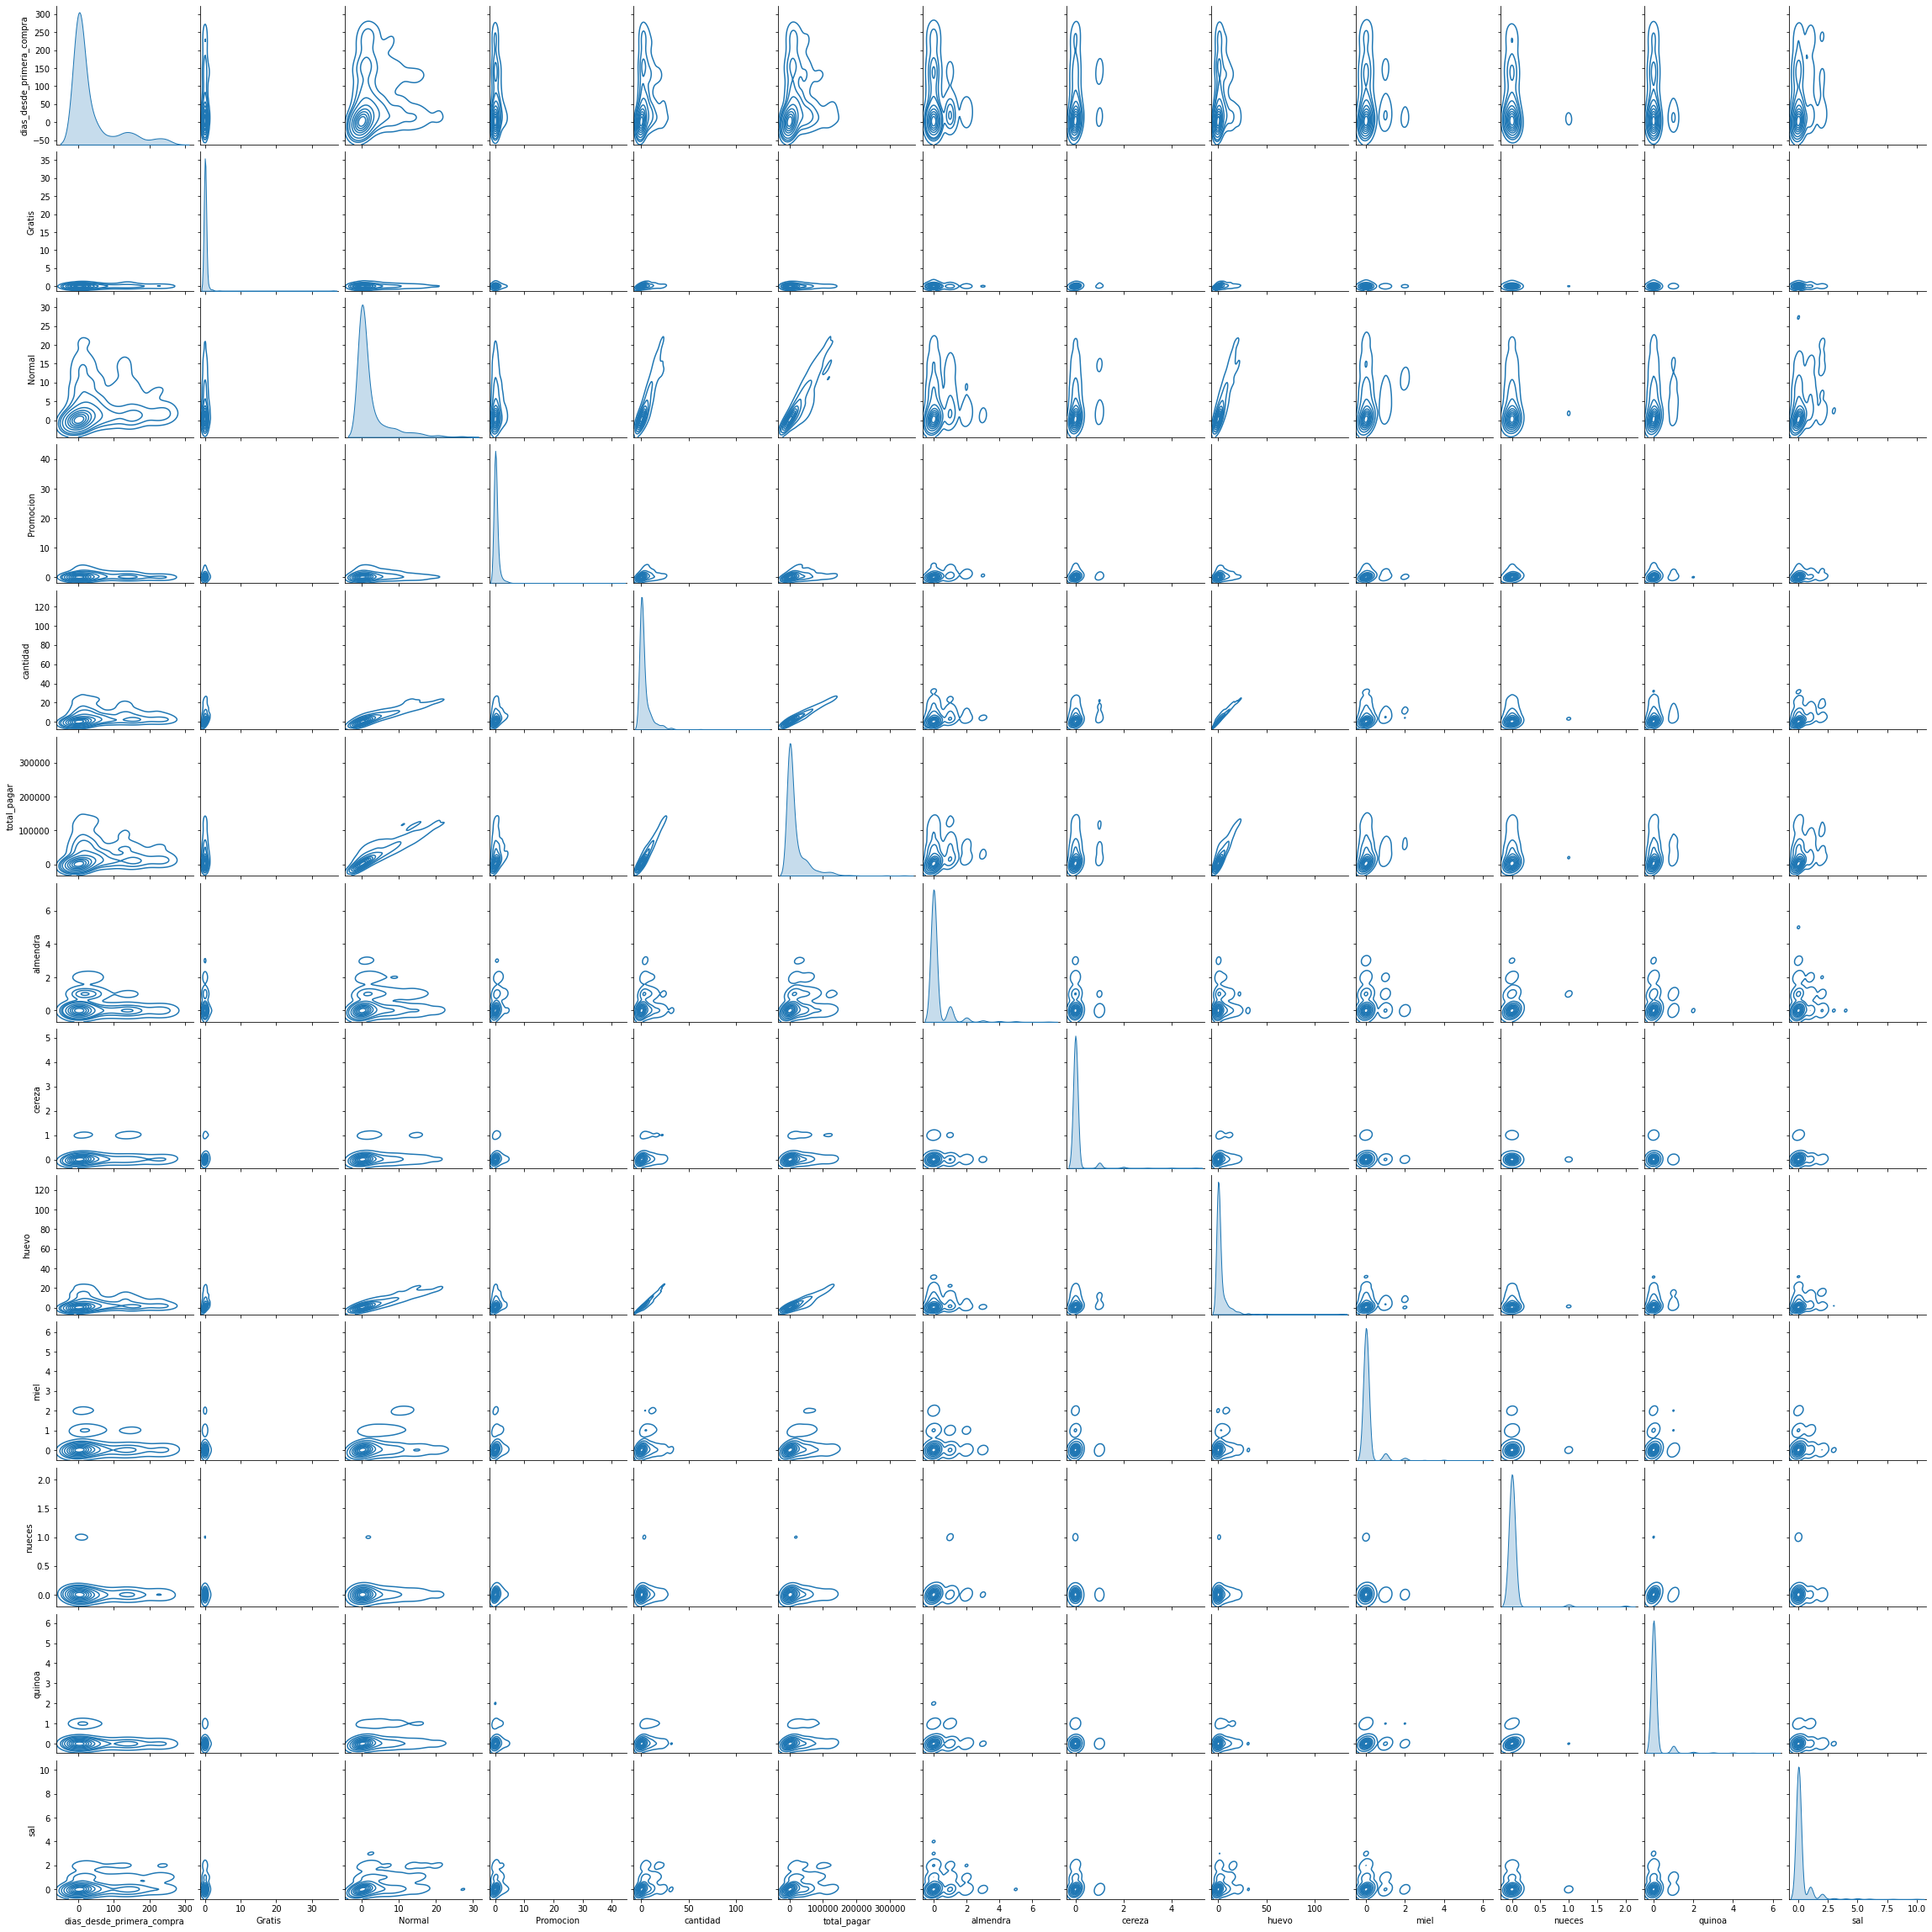

In [58]:
sns_plot = sns.pairplot(gran_tabla,  kind="kde")
sns_plot.savefig("pairplot.png")